This project was learned from sentdex tutorial on youtube.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl as qd
import math 
import pickle

THE BELOW DATA IS GOOGLE STOCK DATA

In [3]:
df=pd.read_csv('GOOGL Stock Data.csv',header=0, index_col='Date', parse_dates=True)

In [4]:
df.shape

(3424, 12)

In [5]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100

df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [6]:
forecast_col = 'Adj. Close'
df.fillna(-99999,inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [7]:
df.dropna(inplace=True)
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,-0.029718,1792602.0,1094.00
2018-01-31,1182.22,0.346805,-0.134312,1643877.0,1053.15
2018-02-01,1181.59,0.495942,0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.081129,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,4.325574,-2.893850,3742469.0,1006.94


In [8]:
from sklearn import preprocessing , svm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [9]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
y = np.array(df['label'])

In [10]:
print(len(X),len(y))

3389 3389


In [11]:
xtrain , xtest , ytrain , ytest = train_test_split(X, y, test_size = 0.25 ,random_state = 0)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2541, 4)
(2541,)
(848, 4)
(848,)


In [12]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
with open('LinearRegression.pickle','wb') as f:
    pickle.dump(lr,f)
pickle_in = open('LinearRegression.pickle','rb')
lr=pickle.load(pickle_in)

accuracy = lr.score(xtest,ytest)
print(accuracy)

0.9790082239330239


In [13]:
print(forecast_out)

35


In [14]:
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

In [15]:
forecast_set = lr.predict(X_lately)
print("For next",forecast_out,"days the forecast is: ")
print("")
print(forecast_set)
print("")
print("With a accuracy of :",accuracy*100,"%")

For next 35 days the forecast is: 

[1009.84488135 1012.4971434  1010.7977415  1050.39602606 1053.92229198
 1053.96481568 1063.71608707 1064.79003281 1072.03557505 1063.76186319
 1074.52941006 1069.39800491 1066.12726797 1062.46573765 1063.76356908
 1058.18921556 1070.18059232 1056.17237296 1056.36733869 1072.47072981
 1073.92175211 1078.51851019 1094.0689381  1083.55688373 1056.44588517
 1056.97526633 1045.28630106 1031.05055938 1038.80064437 1053.55513142
 1066.00958519 1070.68652095 1073.78158864 1069.08333306 1073.12502934]

With a accuracy of : 97.90082239330239 %


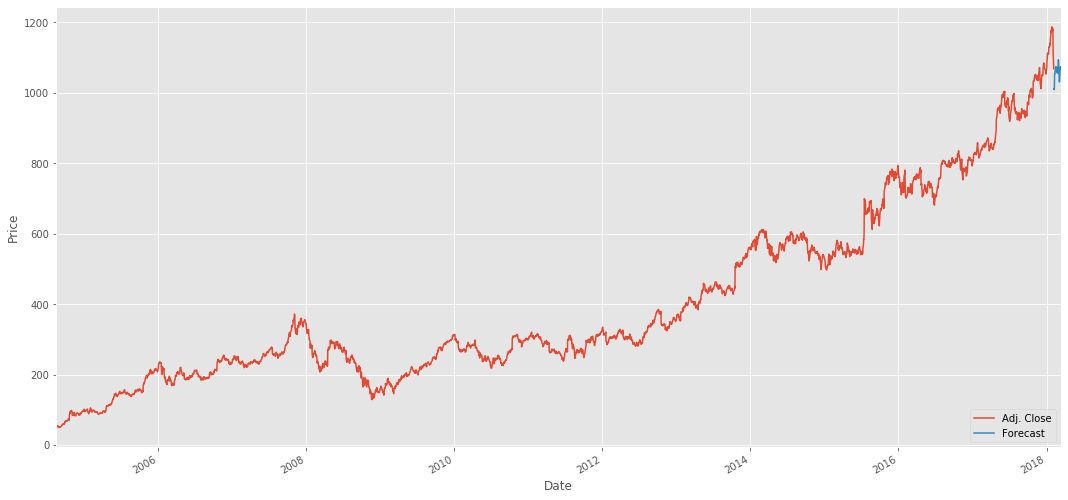

In [16]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix = next_unix + one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

plt.figure(figsize=(18,9))
df['Adj. Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

THE END